# Surface Water Quality Monitoring

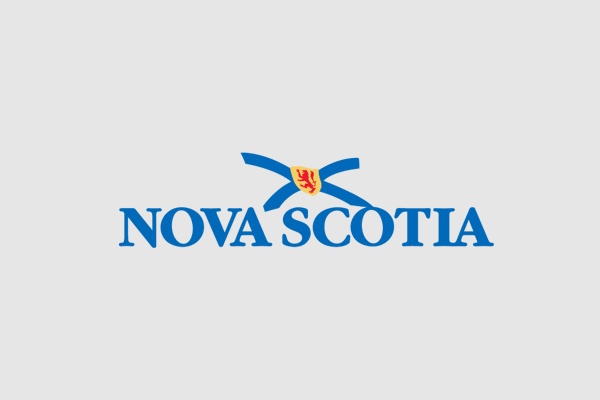

## 1. Introduction

Surface water is water that is found in lakes, rivers, streams, ponds, and other natural watercourses. It is also found in marine bays, estuaries, and oceans. This valuable resource provides drinking water, supplies Nova Scotian businesses with their water supply, and supports important industries such as fishing, farming and electric power generation. Surface water supports various recreational activities such as swimming and boating, and provides habitat for aquatic life.

The Nova Scotia Automated Surface Water Quality Monitoring Network was established in 2002 to assess water quality in surface waters across the province at five stations (and one discontinued station, St Mary's River).  The results are used to help manage water resources, determine baseline water quality in lakes and watercourses throughout the province, evaluate the impact of human activities on surface water, and assess long term trends in water quality associated with issues such as acid rain, eutrophication, and climate change.

The data is measurements collected on an hourly timestep using water quality instruments at five stations: Pockwock Lake (NS01EH0050), Shelburne River (NS01ED9111), Northeast Margaree River (NS01FB0001), Kelley River (NS01DL0009) and LaHave River (NS01EF0002). Data for the discontinued St Mary's River (NS01EO0001) site is for the 2007 to 2008 time period. The measured water quality parameters are the following: temperature (°C), pH (-), conductivity (µS/cm), and dissolved oxygen (mg/L).

The aim of this project is to visualize these key metrics over a year spanning from 2023-11-15 to 2024-12-06.

The data source can be found here: https://data.novascotia.ca/Nature-and-Environment/Surface-Water-Quality-Monitoring-Network-Continuou/bkfi-mjgw/about_data

## 2. Data Ingestion and Cleaning

In [1]:
#  Import Libraries
import json,urllib.request
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Fetch the data
url = "https://data.novascotia.ca/resource/bkfi-mjgw.json?$limit=30000&$offset=823744"
data = urllib.request.urlopen(url).read()

# Load JSON
output = json.loads(data)


In [3]:
# Convert to DataFrame
df = pd.DataFrame(output)
df

,date,time,temperature_c,ph,specific_conductance_s_cm,dissolved_oxygen_mg_l,station_number
0,2024-11-28T00:00:00.000,13:00,6.06,5.75,23.5,12.2,NS01EF0002
1,2024-11-28T00:00:00.000,14:00,6.18,5.77,23.3,12.23,NS01EF0002
2,2024-11-28T00:00:00.000,15:00,6.23,5.77,23.8,12.24,NS01EF0002
3,2024-11-28T00:00:00.000,16:00,6.23,5.76,23.2,12.22,NS01EF0002
4,2024-11-28T00:00:00.000,17:00,6.21,5.75,23,12.2,NS01EF0002
...,...,...,...,...,...,...,...
29995,2024-11-21T00:00:00.000,09:00,6.4,5.33,0,0,NS01EH0050
29996,2024-11-21T00:00:00.000,10:00,6.09,5.64,0,0,NS01EH0050
29997,2024-11-21T00:00:00.000,11:00,6.31,5.59,0,11.53,NS01EH0050
29998,2024-11-21T00:00:00.000,12:00,6.76,5.69,0,11.45,NS01EH0050


Glosarry of  Terms:
1. date: Date of Recording (From 2023-11-15 to 2024-12-06)
2. time: Hour of recording (24hr format)
3. temperature_c: Temperature in Celsius
4. ph: pH
5. specific_conductance_s_cm: Specific Conductance (S/cm)
6. dissolved_oxygen_mg_l: Dissolved Oxygen (mg/L)
7. station_number: Unique number assigned to location where recording took place

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   date                       30000 non-null  object
 1   time                       30000 non-null  object
 2   temperature_c              27563 non-null  object
 3   ph                         26913 non-null  object
 4   specific_conductance_s_cm  27501 non-null  object
 5   dissolved_oxygen_mg_l      27808 non-null  object
 6   station_number             30000 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [5]:
df.isnull().sum()

date                            0
time                            0
temperature_c                2437
ph                           3087
specific_conductance_s_cm    2499
dissolved_oxygen_mg_l        2192
station_number                  0
dtype: int64

In [6]:
#convert measurements to proper data type
df['temperature_c'].astype(float)
df['ph'].astype(float)
df['specific_conductance_s_cm'].astype(float)
df['dissolved_oxygen_mg_l'].astype(float)

0        12.20
1        12.23
2        12.24
3        12.22
4        12.20
         ...  
29995     0.00
29996     0.00
29997    11.53
29998    11.45
29999    11.29
Name: dissolved_oxygen_mg_l, Length: 30000, dtype: float64

In [7]:
# Convert to Numeric Type 
df['temperature_c'] = pd.to_numeric(df['temperature_c'], errors='coerce')
df['ph'] = pd.to_numeric(df['ph'], errors='coerce')
df['specific_conductance_s_cm'] = pd.to_numeric(df['specific_conductance_s_cm'], errors='coerce')
df['dissolved_oxygen_mg_l'] = pd.to_numeric(df['dissolved_oxygen_mg_l'], errors='coerce')

In [8]:
df.describe()

,temperature_c,ph,specific_conductance_s_cm,dissolved_oxygen_mg_l
count,27563.000000,26913.000000,27501.000000,27808.000000
mean,11.227196,5.786413,72.316858,10.262859
std,8.282085,1.156730,82.683864,2.221373
min,-0.030000,4.030000,0.000000,0.000000
25%,2.780000,4.630000,23.000000,8.870000
50%,12.060000,5.840000,29.000000,10.160000
75%,18.550000,7.040000,102.000000,12.050000
max,30.070000,7.860000,347.000000,13.930000


Observations:
1. Temperature (°C)

   Min: -0.03°C — very low but expected in winter.
   
   Max: 30.07°C — quite warm, but still realistic in hot seasons.
   
   Std Dev: 8.28 is quite high → suggests some extreme temperature readings
   
   
2. pH

   Mean: 5.79 → slightly acidic (pure water is pH 7).
   
   Min: 4.03 → more acidic than expected (could indicate pollution, acid rain,or outliers).
   
   Max: 7.86 → almost neutral.
   
   
3. Specific Conductance (S/cm)

   Mean: 72.32 → indicating moderate dissolved ions (like salts, minerals).
   
   Min: 0 → some readings had no conductivity (could indicate very pure water, or sensor error or    outliers).
   
   Max: 347 → high mineral content at times.
   
   Spread: Huge variability (std = 82.68), some places are much more "salty" or "mineral-rich"      than others.


4. Dissolved Oxygen (mg/L)

   Mean: ~10.26 mg/L → pretty healthy oxygen levels for aquatic life.
   
   Min: 0 → i.e no oxygen could indicate anoxic events — dangerous for fish).
   
   Max: 13.93 → very oxygen-rich water (cold water usually holds more oxygen).
   
   Spread: Moderate (std = 2.22), but oxygen levels vary across time/space.
   
    

## 3. Outlier Analysis

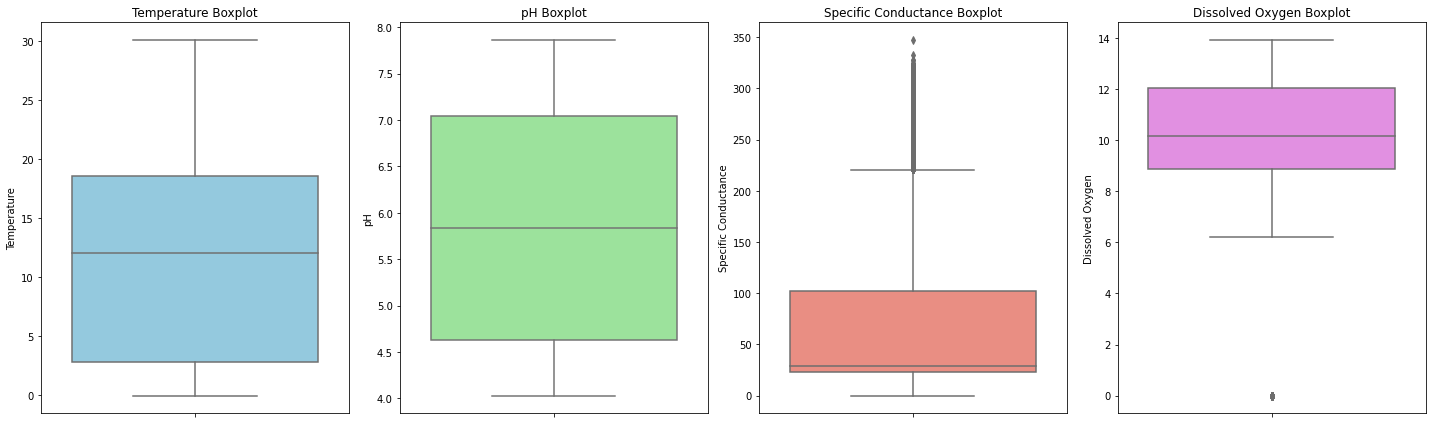

In [9]:
plt.figure(figsize=(20,6))

plt.subplot(1,4,1)
sns.boxplot(y=df['temperature_c'],color='skyblue')
plt.title("Temperature Boxplot")
plt.ylabel('Temperature')


plt.subplot(1,4,2)
sns.boxplot(y=df['ph'],color='lightgreen')
plt.title("pH Boxplot")
plt.ylabel('pH')

plt.subplot(1,4,3)
sns.boxplot(y=df['specific_conductance_s_cm'],color='salmon')
plt.title("Specific Conductance Boxplot")
plt.ylabel('Specific Conductance')

plt.subplot(1,4,4)
sns.boxplot(y=df['dissolved_oxygen_mg_l'],color='violet')
plt.title("Dissolved Oxygen Boxplot")
plt.ylabel('Dissolved Oxygen')

plt.tight_layout()
plt.show()

There is a clear presence of outliers in the data especially for Specific conductance and dissolved oxygen. I will remove them using 1.5* IQR method

In [10]:
T_Q1=df["temperature_c"].quantile(0.25)
T_Q3=df["temperature_c"].quantile(0.75)
T_IQR=T_Q3-T_Q1

temp_outliers_df=df[(df["temperature_c"]>(T_Q3+1.5*T_IQR))|(df["temperature_c"]<(T_Q1-1.5*T_IQR))].copy()

In [11]:
P_Q1=df["ph"].quantile(0.25)
P_Q3=df["ph"].quantile(0.75)
P_IQR=P_Q3-P_Q1

ph_outliers_df=df[(df["ph"]>(P_Q3+1.5*P_IQR))|(df["ph"]<(P_Q1-1.5*P_IQR))].copy()

In [12]:
S_Q1=df["specific_conductance_s_cm"].quantile(0.25)
S_Q3=df["specific_conductance_s_cm"].quantile(0.75)
S_IQR=S_Q3-S_Q1

sc_outliers_df=df[(df["specific_conductance_s_cm"]>(S_Q3+1.5*S_IQR))|(df["specific_conductance_s_cm"]<(S_Q1-1.5*S_IQR))].copy()

In [13]:
D_Q1=df["dissolved_oxygen_mg_l"].quantile(0.25)
D_Q3=df["dissolved_oxygen_mg_l"].quantile(0.75)
D_IQR=D_Q3-D_Q1

do_outliers_df=df[(df["dissolved_oxygen_mg_l"]>(D_Q3+1.5*D_IQR))|(df["dissolved_oxygen_mg_l"]<(D_Q1-1.5*D_IQR))].copy()


In [14]:
#non outlier data set

non_outliers_df=df[(~df.index.isin(sc_outliers_df.index))&(~df.index.isin(do_outliers_df.index))]
non_outliers_df.describe()

,temperature_c,ph,specific_conductance_s_cm,dissolved_oxygen_mg_l
count,24224.000000,23574.000000,24162.000000,24469.000000
mean,10.757565,5.618559,50.180155,10.545101
std,8.530815,1.122036,51.520831,1.786727
min,-0.030000,4.030000,0.000000,6.220000
25%,2.390000,4.540000,22.000000,8.950000
50%,9.600000,5.720000,29.000000,10.790000
75%,18.680000,6.580000,32.000000,12.190000
max,30.070000,7.860000,220.000000,13.930000


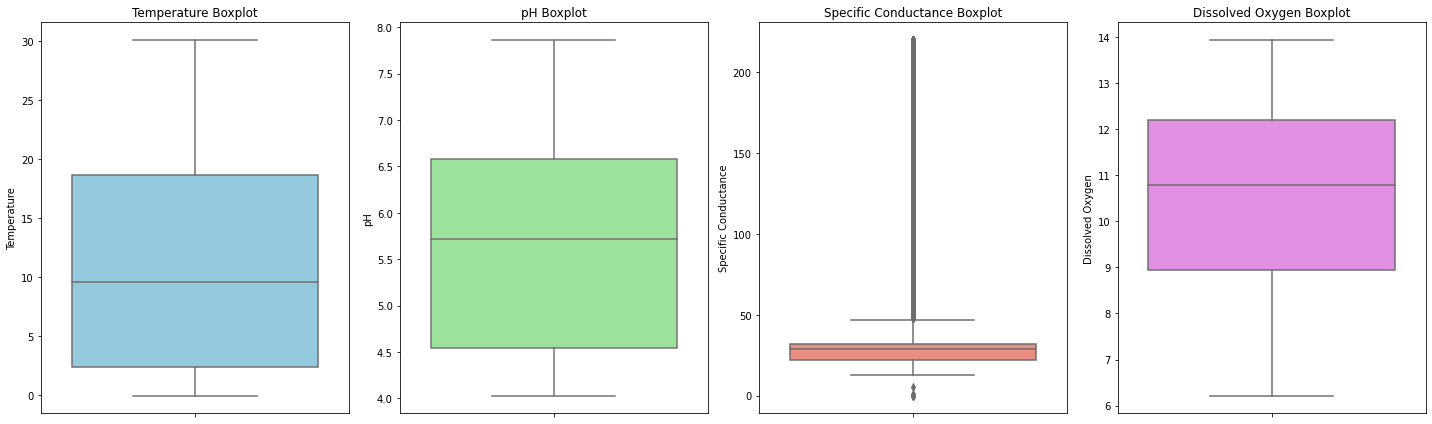

In [15]:
plt.figure(figsize=(20,6))

plt.subplot(1,4,1)
sns.boxplot(y=non_outliers_df['temperature_c'],color='skyblue')
plt.title("Temperature Boxplot")
plt.ylabel('Temperature')


plt.subplot(1,4,2)
sns.boxplot(y=non_outliers_df['ph'],color='lightgreen')
plt.title("pH Boxplot")
plt.ylabel('pH')

plt.subplot(1,4,3)
sns.boxplot(y=non_outliers_df['specific_conductance_s_cm'],color='salmon')
plt.title("Specific Conductance Boxplot")
plt.ylabel('Specific Conductance')

plt.subplot(1,4,4)
sns.boxplot(y=non_outliers_df['dissolved_oxygen_mg_l'],color='violet')
plt.title("Dissolved Oxygen Boxplot")
plt.ylabel('Dissolved Oxygen')

plt.tight_layout()
plt.show()


There appears to be new outliers in the specific conductivity table

In [16]:
S_Q1=non_outliers_df["specific_conductance_s_cm"].quantile(0.25)
S_Q3=non_outliers_df["specific_conductance_s_cm"].quantile(0.75)
S_IQR=S_Q3-S_Q1

new_sc_outliers_df=non_outliers_df[(non_outliers_df["specific_conductance_s_cm"]>(S_Q3+1.5*S_IQR))|(non_outliers_df["specific_conductance_s_cm"]<(S_Q1-1.5*S_IQR))].copy()
new_sc_outliers_df.describe()

,temperature_c,ph,specific_conductance_s_cm,dissolved_oxygen_mg_l
count,5501.000000,5410.000000,5501.000000,5501.000000
mean,5.906970,7.200965,135.547355,11.744528
std,5.089066,0.192241,46.284026,1.313233
min,-0.020000,5.590000,0.000000,8.040000
25%,1.810000,7.110000,99.000000,11.080000
50%,4.760000,7.230000,127.000000,11.930000
75%,8.420000,7.310000,174.000000,12.820000
max,21.900000,7.860000,220.000000,13.930000


In [17]:
new_df=non_outliers_df[~non_outliers_df.index.isin(new_sc_outliers_df.index)]
new_df.describe()

,temperature_c,ph,specific_conductance_s_cm,dissolved_oxygen_mg_l
count,18723.000000,18164.000000,18661.000000,18968.000000
mean,12.182718,5.147252,25.015106,10.197250
std,8.809384,0.809302,4.879080,1.754976
min,-0.030000,4.030000,13.000000,6.220000
25%,2.660000,4.390000,21.000000,8.670000
50%,14.230000,5.060000,25.000000,9.820000
75%,19.910000,5.870000,29.000000,11.910000
max,30.070000,7.020000,47.000000,13.710000


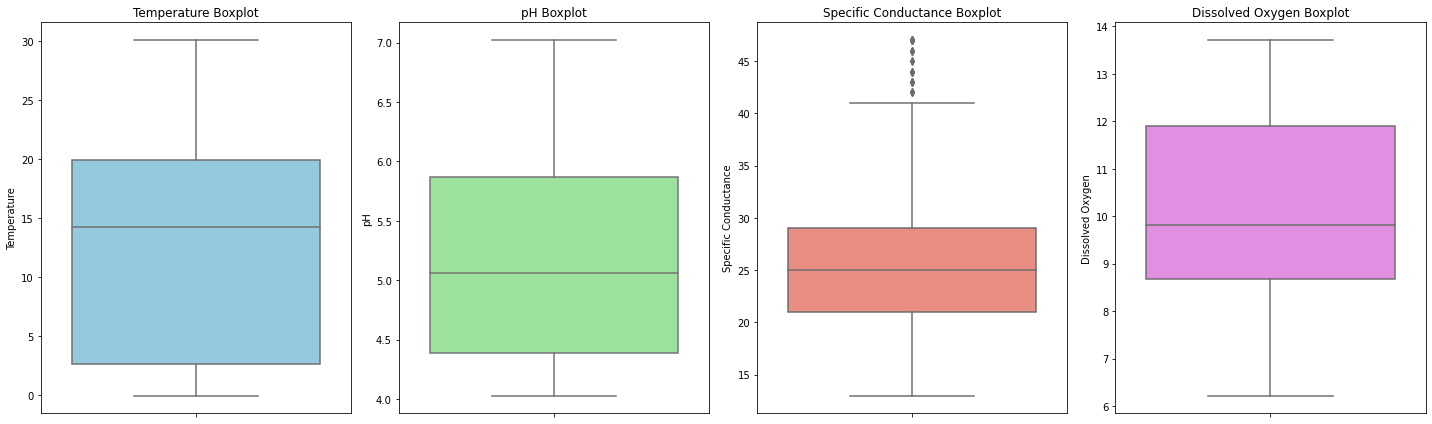

In [18]:
plt.figure(figsize=(20,6))

plt.subplot(1,4,1)
sns.boxplot(y=new_df['temperature_c'],color='skyblue')
plt.title("Temperature Boxplot")
plt.ylabel('Temperature')


plt.subplot(1,4,2)
sns.boxplot(y=new_df['ph'],color='lightgreen')
plt.title("pH Boxplot")
plt.ylabel('pH')

plt.subplot(1,4,3)
sns.boxplot(y=new_df['specific_conductance_s_cm'],color='salmon')
plt.title("Specific Conductance Boxplot")
plt.ylabel('Specific Conductance')

plt.subplot(1,4,4)
sns.boxplot(y=new_df['dissolved_oxygen_mg_l'],color='violet')
plt.title("Dissolved Oxygen Boxplot")
plt.ylabel('Dissolved Oxygen')

plt.tight_layout()
plt.show()


In [19]:
new_df.describe()

,temperature_c,ph,specific_conductance_s_cm,dissolved_oxygen_mg_l
count,18723.000000,18164.000000,18661.000000,18968.000000
mean,12.182718,5.147252,25.015106,10.197250
std,8.809384,0.809302,4.879080,1.754976
min,-0.030000,4.030000,13.000000,6.220000
25%,2.660000,4.390000,21.000000,8.670000
50%,14.230000,5.060000,25.000000,9.820000
75%,19.910000,5.870000,29.000000,11.910000
max,30.070000,7.020000,47.000000,13.710000


Although there are still a few outliers we can leave them because they do not appear to be significant

In [20]:
# convert date to datetime
new_df['date'] = pd.to_datetime(new_df['date'])

# Now, combine 'date' and 'time' into a new datetime column
new_df['datetime'] = pd.to_datetime(new_df['date'].dt.date.astype(str) + ' ' + new_df['time'])

We can fill missing values using extrapolation as water quality is not expected to show drastic changes within a short span.

In [21]:
#Fill Missing Values Using Extrapolation
new_df['temperature_c'] = new_df['temperature_c'].interpolate(limit_direction='both').fillna(method='bfill').fillna(method='ffill')
new_df['ph'] = new_df['ph'].interpolate(limit_direction='both').fillna(method='bfill').fillna(method='ffill')
new_df['specific_conductance_s_cm'] = new_df['specific_conductance_s_cm'].interpolate(limit_direction='both').fillna(method='bfill').fillna(method='ffill')
new_df['dissolved_oxygen_mg_l'] = new_df['dissolved_oxygen_mg_l'].interpolate(limit_direction='both').fillna(method='bfill').fillna(method='ffill')

## 3. Exploratory Data Analysis

In [22]:
daily_counts = new_df.groupby('date')[['temperature_c','ph','specific_conductance_s_cm','dissolved_oxygen_mg_l']].mean().reset_index()

In [23]:
weekly_counts = daily_counts.groupby(pd.Grouper(key='date', freq='W-MON')).mean().reset_index()

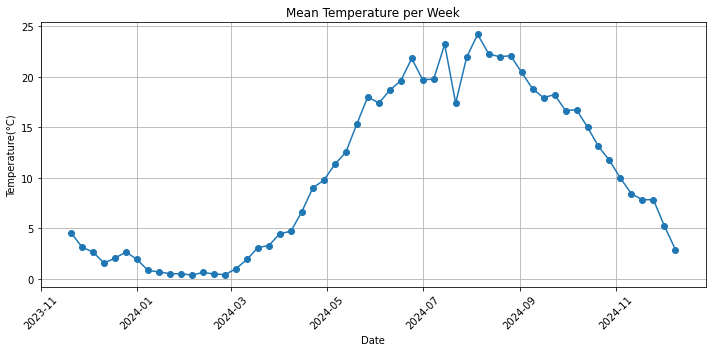

In [24]:
# Plot line graph
plt.figure(figsize=(10, 5))

plt.plot(
    weekly_counts['date'].to_numpy(), 
    weekly_counts['temperature_c'].to_numpy(), 
    marker='o', linestyle='-'
)
plt.title('Mean Temperature per Week')
plt.xlabel('Date')
plt.ylabel('Temperature(°C)')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

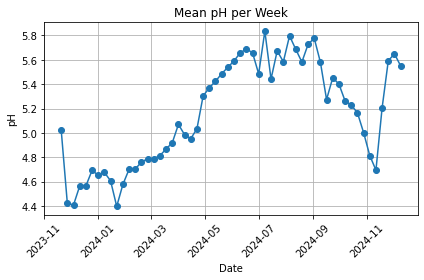

In [25]:
plt.plot(
    weekly_counts['date'].to_numpy(), 
    weekly_counts['ph'].to_numpy(), 
    marker='o', linestyle='-'
)
plt.title('Mean pH per Week')
plt.xlabel('Date')
plt.ylabel('pH')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()



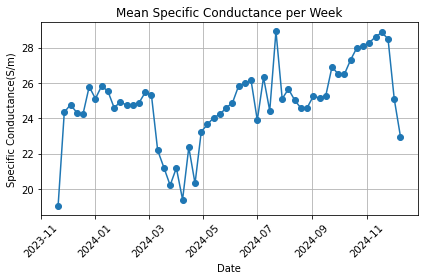

In [26]:

plt.plot(
    weekly_counts['date'].to_numpy(), 
    weekly_counts['specific_conductance_s_cm'].to_numpy(), 
    marker='o', linestyle='-'
)
plt.title('Mean Specific Conductance per Week')
plt.xlabel('Date')
plt.ylabel('Specific Conductance(S/m)')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


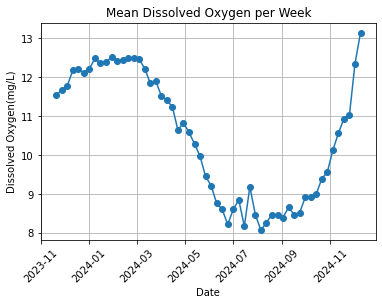

In [27]:
plt.plot(
    weekly_counts['date'].to_numpy(), 
    weekly_counts['dissolved_oxygen_mg_l'].to_numpy(), 
    marker='o', linestyle='-'
)
plt.title('Mean Dissolved Oxygen per Week')
plt.xlabel('Date')
plt.ylabel('Dissolved Oxygen(mg/L)')
plt.xticks(rotation=45)
plt.grid(True)


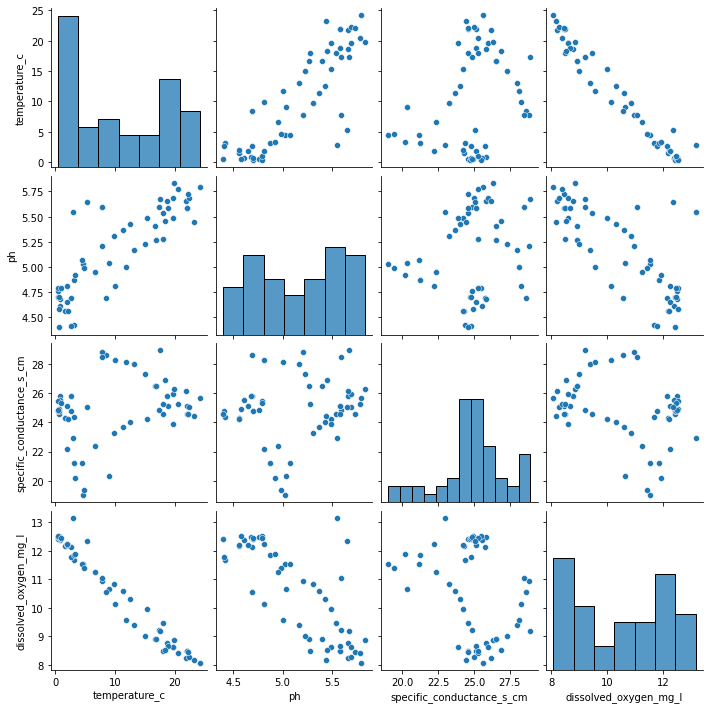

In [28]:
columns = ['temperature_c', 'ph', 'specific_conductance_s_cm', 'dissolved_oxygen_mg_l']
sns.pairplot(weekly_counts[columns])

Observations:
1. As temperature increases, dissolved oxygen decreases as warmer water molecules have more kinetic energy, making it harder for oxygen to stay dissolved which could make it harder for aquatic animals to breathe. 
2. As temperature goes up, specific conductance also tends to go up this is because warmer water often increases the mobility of ions, which raises conductivity.
3. As specific conductance increases, dissolved oxygen decreases. This is because higher specific conductance, which indicates increased salinity or dissolved solids, generally leads to lower dissolved oxygen levels. This is because salinity affects the solubility of oxygen